In [1]:
import pandas as pd
import numpy as np
import os
import re
from datetime import datetime
import plotly.express as px
import plotly.graph_objs as go
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from better_profanity import profanity
from textblob import TextBlob
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

D:\Python\Anaconda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
directory = '/kaggle/input'

for dirname, _, filenames in os.walk(directory):
    for filename in filenames:
        tweets_data = os.path.join(dirname, filename)
        print(tweets_data)

In [3]:
poli_data=pd.read_csv("C:/Users/Admin/Desktop/Untitled Folder 1/Untitled Folder/Tweets/politics/tweets.csv")
poli_data

,Unnamed: 0,Date,User,Tweet,Likes,Retweets
0,0,2023-03-29 15:42:36+00:00,AnandPatni8,@vinodkapri @RahulGandhi Respected Indian Citi...,0.0,0.0
1,1,2023-03-29 15:42:05+00:00,dhinamum,"*Respected Indian Citizens,* Namaskaar I Am Th...",0.0,0.0
2,2,2023-03-29 15:34:29+00:00,PrincetonCGI,1/n-Meet Filmmaker Prakash Jha in New Jersey t...,0.0,0.0
3,3,2023-03-29 15:31:43+00:00,RishiJoeSanu,@MrinalWahal Why would politicians stop using ...,0.0,0.0
4,4,2023-03-29 15:26:48+00:00,itweetsensee,@annamalai_k @narendramodi A state level presi...,0.0,0.0
...,...,...,...,...,...,...
49996,49995,2022-10-15 11:00:52+00:00,vinoims,@kaushikcbasu Cong ruled for 60 +yrs at center...,0.0,0.0
49997,49996,2022-10-15 10:56:51+00:00,Dan_T129,@ARYSabirShakir @OfficialDGISPR It's indian lo...,0.0,0.0
49998,49997,2022-10-15 10:50:52+00:00,shivashan_,@Schandillia A true leader puts the team in fr...,4.0,1.0
49999,49998,2022-10-15 10:41:17+00:00,SUNILKU74204938,Now' Rahul Gandhi is Mahanayak of\nINDIA. Rega...,0.0,0.0


In [4]:
poli_data.shape

(50001, 6)

In [5]:
poli_data.duplicated().sum()

0

In [6]:
poli_data=poli_data.drop_duplicates()

In [7]:
poli_data.isnull().sum()

Unnamed: 0    0
Date          0
User          0
Tweet         1
Likes         2
Retweets      2
dtype: int64

In [8]:
poli_data.dropna(inplace=True)

In [9]:
poli_data.duplicated().sum()

0

In [10]:
poli_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49999 entries, 0 to 50000
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  49999 non-null  object 
 1   Date        49999 non-null  object 
 2   User        49999 non-null  object 
 3   Tweet       49999 non-null  object 
 4   Likes       49999 non-null  float64
 5   Retweets    49999 non-null  float64
dtypes: float64(2), object(4)
memory usage: 2.7+ MB


In [11]:
poli_data.describe()

,Likes,Retweets
count,49999.000000,49999.000000
mean,16.213384,3.594672
std,243.116572,53.452615
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,2.000000,0.000000
max,20716.000000,6551.000000


In [12]:
poli_data_sorted=poli_data.sort_values(by='Likes',ascending=False)

In [13]:
poli_data_sorted.head(10)

,Unnamed: 0,Date,User,Tweet,Likes,Retweets
25620,25619,2023-01-02 04:42:59+00:00,RahulGandhi,"‘Hey Ram’, Khadi, Films and how only India, no...",20716.0,6551.0
45027,45026,2022-10-26 15:26:31+00:00,AyoCaesar,It's disgusting that @UKLabour are policing a ...,13738.0,2232.0
15458,15457,2023-02-15 09:53:21+00:00,AdnanSamiLive,Indeed I did. That was in 1976. That was a dif...,13411.0,1831.0
7697,7697,2023-03-12 12:30:19+00:00,desi_thug1,Future of Indian Politics...\n\n1. Yogi Aditya...,13198.0,1096.0
22029,22028,2023-01-19 06:10:46+00:00,ShashiTharoor,Just amazing. And incomprehensible in the worl...,12941.0,1240.0
39797,39796,2022-11-10 17:10:52+00:00,rohini_sgh,No other leader in Indian politics has been tr...,11743.0,2482.0
36005,36004,2022-11-24 23:27:19+00:00,actor_Nikhil,20 Brave Indian soldiers gave up their lives a...,11594.0,2094.0
20290,20289,2023-01-25 17:48:18+00:00,VishalDadlani,"True ""Indian"" films bring people together. The...",10768.0,1701.0
20589,20588,2023-01-24 13:50:55+00:00,UnSubtleDesi,I’m not sure why Modi supporters are so pertur...,10303.0,1681.0
43846,43845,2022-10-29 00:52:46+00:00,MoeedNj,"Gharida Ji, Unfortunately ""Indian Card"" is dea...",9206.0,3333.0


In [14]:
poli_data.nunique()

Unnamed: 0    49999
Date          49820
User          35108
Tweet         49568
Likes           598
Retweets        312
dtype: int64

In [15]:
poli_data['Date'] = pd.to_datetime(poli_data['Date'])

In [16]:
poli_data

,Unnamed: 0,Date,User,Tweet,Likes,Retweets
0,0,2023-03-29 15:42:36+00:00,AnandPatni8,@vinodkapri @RahulGandhi Respected Indian Citi...,0.0,0.0
1,1,2023-03-29 15:42:05+00:00,dhinamum,"*Respected Indian Citizens,* Namaskaar I Am Th...",0.0,0.0
2,2,2023-03-29 15:34:29+00:00,PrincetonCGI,1/n-Meet Filmmaker Prakash Jha in New Jersey t...,0.0,0.0
3,3,2023-03-29 15:31:43+00:00,RishiJoeSanu,@MrinalWahal Why would politicians stop using ...,0.0,0.0
4,4,2023-03-29 15:26:48+00:00,itweetsensee,@annamalai_k @narendramodi A state level presi...,0.0,0.0
...,...,...,...,...,...,...
49996,49995,2022-10-15 11:00:52+00:00,vinoims,@kaushikcbasu Cong ruled for 60 +yrs at center...,0.0,0.0
49997,49996,2022-10-15 10:56:51+00:00,Dan_T129,@ARYSabirShakir @OfficialDGISPR It's indian lo...,0.0,0.0
49998,49997,2022-10-15 10:50:52+00:00,shivashan_,@Schandillia A true leader puts the team in fr...,4.0,1.0
49999,49998,2022-10-15 10:41:17+00:00,SUNILKU74204938,Now' Rahul Gandhi is Mahanayak of\nINDIA. Rega...,0.0,0.0


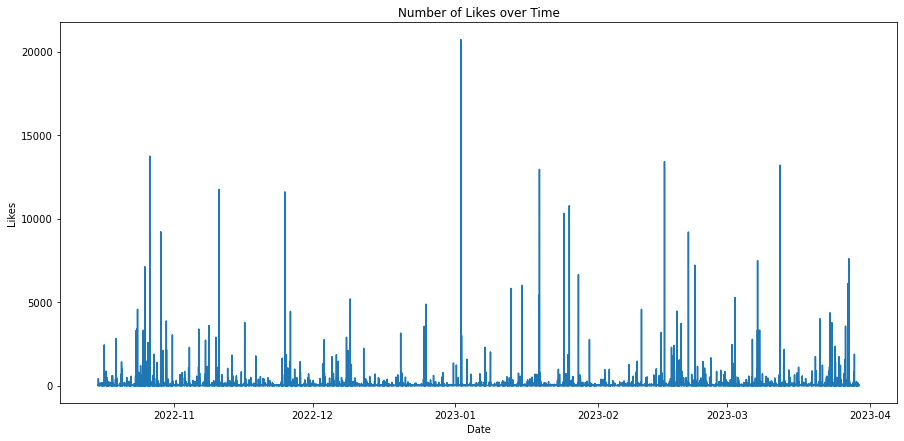

In [17]:
import matplotlib.pyplot as plt
poli_data_sorted_date = poli_data.sort_values('Date')
plt.figure(figsize=[15, 7])
plt.plot(poli_data_sorted_date['Date'], poli_data_sorted_date['Likes'])
plt.xlabel('Date')
plt.ylabel('Likes')
plt.title('Number of Likes over Time')
plt.show()

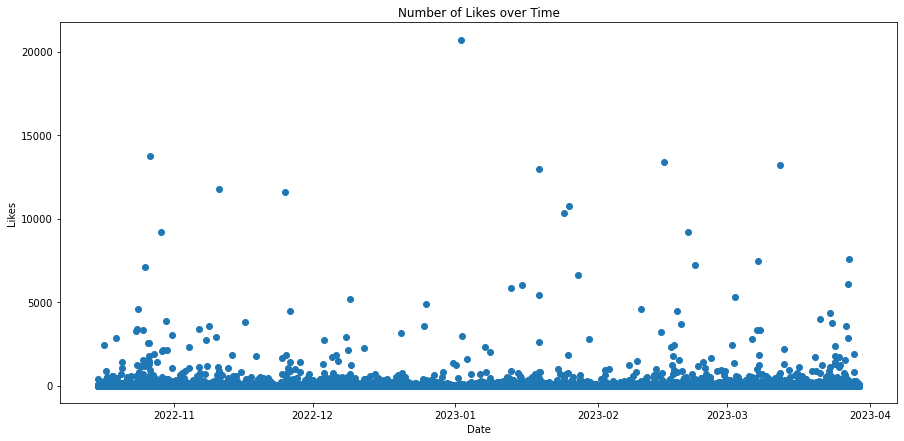

In [18]:
poli_data_sorted_date = poli_data.sort_values('Date')

# Creating a scatter plot
plt.figure(figsize=[15, 7])
plt.scatter(poli_data_sorted_date['Date'], poli_data_sorted_date['Likes'])
plt.xlabel('Date')
plt.ylabel('Likes')
plt.title('Number of Likes over Time')
plt.show()

In [19]:
poli_data['Original_Tweet'] = poli_data['Tweet']
poli_data['DateTime'] = poli_data['Date']
poli_data = poli_data.drop('Date', axis=1)
poli_data['DateTime'] = poli_data['DateTime'].astype(str).apply(lambda x: x.split('+')[0])
poli_data['DateTime'] = pd.to_datetime(poli_data['DateTime'], errors='coerce', format='%Y-%m-%d %H:%M:%S').fillna(pd.Timestamp('1900-01-01'))

poli_data['date'] = poli_data.DateTime.apply(lambda x: x.date())
poli_data['month'] = poli_data.DateTime.apply(lambda x: x.month)
poli_data['year'] = poli_data.DateTime.apply(lambda x: x.year)
poli_data['hour'] = poli_data.DateTime.apply(lambda x: x.hour)

poli_data.head()


,Unnamed: 0,User,Tweet,Likes,Retweets,Original_Tweet,DateTime,date,month,year,hour
0,0,AnandPatni8,@vinodkapri @RahulGandhi Respected Indian Citi...,0.0,0.0,@vinodkapri @RahulGandhi Respected Indian Citi...,2023-03-29 15:42:36,2023-03-29,3,2023,15
1,1,dhinamum,"*Respected Indian Citizens,* Namaskaar I Am Th...",0.0,0.0,"*Respected Indian Citizens,* Namaskaar I Am Th...",2023-03-29 15:42:05,2023-03-29,3,2023,15
2,2,PrincetonCGI,1/n-Meet Filmmaker Prakash Jha in New Jersey t...,0.0,0.0,1/n-Meet Filmmaker Prakash Jha in New Jersey t...,2023-03-29 15:34:29,2023-03-29,3,2023,15
3,3,RishiJoeSanu,@MrinalWahal Why would politicians stop using ...,0.0,0.0,@MrinalWahal Why would politicians stop using ...,2023-03-29 15:31:43,2023-03-29,3,2023,15
4,4,itweetsensee,@annamalai_k @narendramodi A state level presi...,0.0,0.0,@annamalai_k @narendramodi A state level presi...,2023-03-29 15:26:48,2023-03-29,3,2023,15


In [20]:
def clean_tweet(tweet):
    
    
    # Remove Twitter handles
    tweet = re.sub(r'@[A-Za-z0-9_]+', '', tweet)
    
    # Remove hashtags
    tweet = re.sub(r'#', '', tweet)
    
    # Remove URLs
    tweet = re.sub(r'http\S+', '', tweet)
    
    # Remove profanity or offensive words
    profanity.load_censor_words()
    tweet = profanity.censor(tweet)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tweet_tokens = nltk.word_tokenize(tweet)
    tweet = ' '.join([word for word in tweet_tokens if word.lower() not in stop_words])
    
    # Remove extra whitespaces
    tweet = re.sub(r'\s+', ' ', tweet).strip()
    
    return tweet

In [21]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
poli_data['Tweet']=poli_data['Tweet'].apply(clean_tweet)

In [23]:
 poli_data.head()

,Unnamed: 0,User,Tweet,Likes,Retweets,Original_Tweet,DateTime,date,month,year,hour
0,0,AnandPatni8,"Respected Indian Citizens , Namaskaar🙏I origin...",0.0,0.0,@vinodkapri @RahulGandhi Respected Indian Citi...,2023-03-29 15:42:36,2023-03-29,3,2023,15
1,1,dhinamum,"* Respected Indian Citizens , * Namaskaar Orig...",0.0,0.0,"*Respected Indian Citizens,* Namaskaar I Am Th...",2023-03-29 15:42:05,2023-03-29,3,2023,15
2,2,PrincetonCGI,1/n-Meet Filmmaker Prakash Jha New Jersey talk...,0.0,0.0,1/n-Meet Filmmaker Prakash Jha in New Jersey t...,2023-03-29 15:34:29,2023-03-29,3,2023,15
3,3,RishiJoeSanu,would politicians stop using religion politics...,0.0,0.0,@MrinalWahal Why would politicians stop using ...,2023-03-29 15:31:43,2023-03-29,3,2023,15
4,4,itweetsensee,"state level president knows policy PM , union ...",0.0,0.0,@annamalai_k @narendramodi A state level presi...,2023-03-29 15:26:48,2023-03-29,3,2023,15


In [24]:
# Create TextBlob objects for each tweet in poli_data
sentiment_objects = [TextBlob(tweet) for tweet in poli_data['Tweet']]

# Create a list of polarity values and tweet text
sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects]

# Create a dataframe of each tweet against its polarity
sentiment_df = pd.DataFrame(sentiment_values, columns=["polarity", "tweet"])

poli_data['Polarity'] = sentiment_df['polarity']

In [25]:
poli_data['Sentiment'] = poli_data['Polarity'].apply(lambda x: 'Positive' if x > 0 else 'Negative' if x < 0 else 'Neutral')


In [26]:
poli_data.head()

,Unnamed: 0,User,Tweet,Likes,Retweets,Original_Tweet,DateTime,date,month,year,hour,Polarity,Sentiment
0,0,AnandPatni8,"Respected Indian Citizens , Namaskaar🙏I origin...",0.0,0.0,@vinodkapri @RahulGandhi Respected Indian Citi...,2023-03-29 15:42:36,2023-03-29,3,2023,15,-0.062500,Negative
1,1,dhinamum,"* Respected Indian Citizens , * Namaskaar Orig...",0.0,0.0,"*Respected Indian Citizens,* Namaskaar I Am Th...",2023-03-29 15:42:05,2023-03-29,3,2023,15,-0.062500,Negative
2,2,PrincetonCGI,1/n-Meet Filmmaker Prakash Jha New Jersey talk...,0.0,0.0,1/n-Meet Filmmaker Prakash Jha in New Jersey t...,2023-03-29 15:34:29,2023-03-29,3,2023,15,0.173232,Positive
3,3,RishiJoeSanu,would politicians stop using religion politics...,0.0,0.0,@MrinalWahal Why would politicians stop using ...,2023-03-29 15:31:43,2023-03-29,3,2023,15,0.000000,Neutral
4,4,itweetsensee,"state level president knows policy PM , union ...",0.0,0.0,@annamalai_k @narendramodi A state level presi...,2023-03-29 15:26:48,2023-03-29,3,2023,15,0.214286,Positive


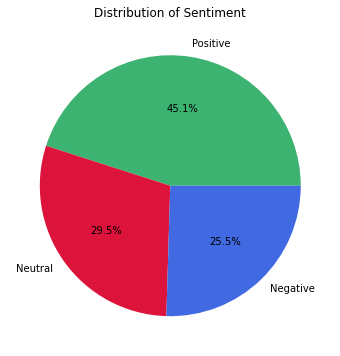

In [27]:

# Count the number of occurrences for each sentiment
sentiment_counts = poli_data['Sentiment'].value_counts()

# Define custom colors for the pie chart
colors = ['mediumseagreen', 'crimson', 'royalblue']

# Create a pie chart of the Sentiment column
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, colors=colors, autopct='%1.1f%%')

# Set the chart title
plt.title('Distribution of Sentiment')

# Display the chart
plt.show()

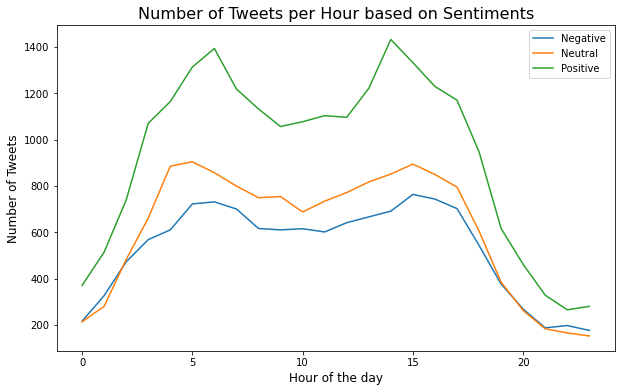

In [28]:
hourly_sentiment_counts = poli_data.groupby(['hour', 'Sentiment']).size().unstack().fillna(0)

plt.figure(figsize=(10, 6))

for sentiment in hourly_sentiment_counts.columns:
    plt.plot(hourly_sentiment_counts.index, hourly_sentiment_counts[sentiment], label=sentiment)


plt.title('Number of Tweets per Hour based on Sentiments', fontsize=16)
plt.xlabel('Hour of the day', fontsize=12)
plt.ylabel('Number of Tweets', fontsize=12)
plt.legend()
plt.show()

In [29]:
import wordcloud

In [30]:
from PIL import ImageFont
font = ImageFont.truetype(r'C:/WINDOWS/Fonts/Calibri.ttf')

In [31]:
import os
os.path.exists('C:/WINDOWS/Fonts/Calibri.ttf')

True

In [32]:
poli3 = poli_data[['Tweet', 'Sentiment']]
poli3

,Tweet,Sentiment
0,"Respected Indian Citizens , Namaskaar🙏I origin...",Negative
1,"* Respected Indian Citizens , * Namaskaar Orig...",Negative
2,1/n-Meet Filmmaker Prakash Jha New Jersey talk...,Positive
3,would politicians stop using religion politics...,Neutral
4,"state level president knows policy PM , union ...",Positive
...,...,...
49996,Cong ruled 60 +yrs center & amp ; state level ...,Positive
49997,'s indian lobbyists winning . Pakistani busy f...,Positive
49998,true leader puts team front success . failure ...,Negative
49999,' Rahul Gandhi Mahanayak INDIA . Regarding Bha...,Neutral


In [33]:
non_meaningful_words = ['cr', 'amp', 'rs', 'u', 'l']

def remove_non_meaningful_words(text):
    tokens = text.split()
    filtered_tokens = [token for token in tokens if token not in non_meaningful_words]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

poli3['Tweet'] = poli3['Tweet'].apply(remove_non_meaningful_words)

In [43]:
all_words = " ".join([sentence for sentence in poli_data['Tweet']])
all_words = all_words.split()

freq_dict = {}
for word in all_words:
    # set the default value to 0
    freq_dict.setdefault(word, 0)
    # increment the value by 1
    freq_dict[word] += 1

voc_freq_dict = dict(sorted(freq_dict.items(), key=lambda item: item[1], reverse = True))
print(len(voc_freq_dict))

71348


In [44]:
import re

def remove_punctuation(text):
    # Define the pattern to match punctuation
    punctuation_pattern = r'[^\w\s]'
    
    # Remove punctuation using regular expressions
    text_without_punctuation = re.sub(punctuation_pattern, '', text)
    
    return text_without_punctuation

# Apply the remove_punctuation function to the 'Tweet' column in your DataFrame
poli_data['Tweet'] = poli_data['Tweet'].apply(remove_punctuation)

In [45]:
def remove_single_words_except_ai(text):
    # except for 'a' and 'i'
    single_word_pattern = r'\b(?!(a|i)\b)\w\b'
    
    text_without_single_words = re.sub(single_word_pattern, '', text)
    
    return text_without_single_words

poli_data['Tweet'] = poli_data['Tweet'].apply(remove_single_words_except_ai)

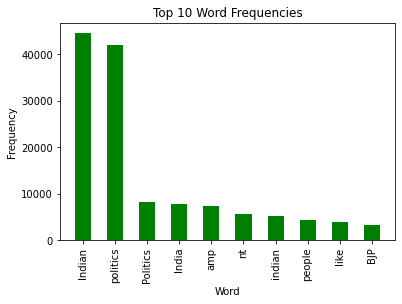

In [46]:
import itertools

hist_plot = dict(itertools.islice(voc_freq_dict.items(), 10))

plt.bar(hist_plot.keys(), hist_plot.values(), width=0.5, color='g')
plt.xticks(rotation=90)
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Top 10 Word Frequencies')
plt.show()

## These are some top words from tweets

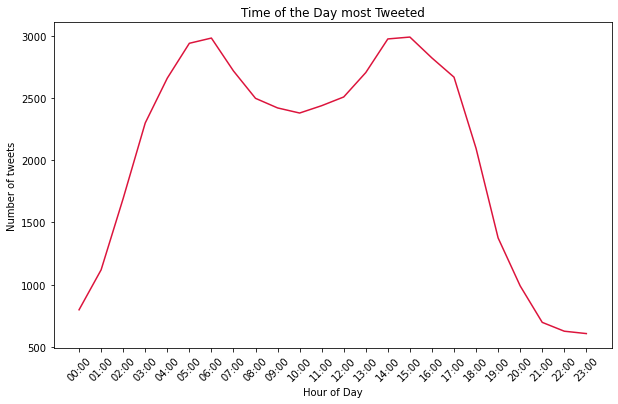

In [49]:
def format_hour(h: int):
    h = str(h)
    if len(h) == 1:
        h = '0' + h
    h = h + ":00"
    return h

hourly = poli_data.groupby('hour')['Tweet'].count()
hourly = pd.DataFrame(hourly).reset_index()
hourly.columns = ['Hour of Day', 'Number of tweets']
hourly['Hour of Day'] = hourly['Hour of Day'].apply(format_hour)

plt.figure(figsize=(10, 6))
plt.plot(hourly['Hour of Day'], hourly['Number of tweets'], color='crimson')
plt.xlabel('Hour of Day')
plt.ylabel('Number of tweets')
plt.title('Time of the Day most Tweeted')
plt.xticks(rotation=45)
plt.show()


In [50]:
def format_hour(h: int):
    h = str(h)
    if len(h) == 1:
        h = '0' + h
    h = h + ":00"
    return h

sentiment_hourly = poli_data.groupby(['Sentiment', 'hour'])['Tweet'].count()
sentiment_hourly = pd.DataFrame(sentiment_hourly).reset_index()
sentiment_hourly.columns = ['Sentiment', 'Hour of Day', 'Number of Tweets']
sentiment_hourly['Hour of Day'] = sentiment_hourly['Hour of Day'].apply(format_hour)

fig = px.line_polar(
    data_frame=sentiment_hourly,
    r=sentiment_hourly['Number of Tweets'],
    theta='Hour of Day',
    line_close=True,
    color='Sentiment',
    color_discrete_sequence=['crimson', 'royalblue', 'mediumseagreen'],
    line_dash='Sentiment'
)
fig.update_layout(
    title="Time of Day: Number of Positive, Negative, and Neutral Tweets",
    title_x=0.5,
    template="ggplot2"
)
fig.show()

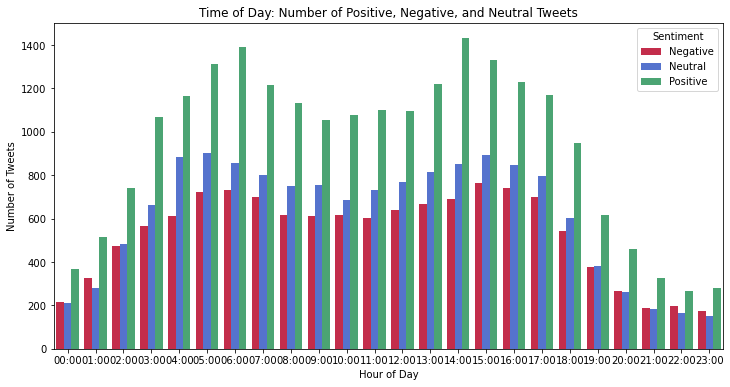

In [51]:
def format_hour(h: int):
    h = str(h)
    if len(h) == 1:
        h = '0' + h
    h = h + ":00"
    return h

sentiment_hourly = poli_data.groupby(['Sentiment', 'hour'])['Tweet'].count().reset_index()
sentiment_hourly.columns = ['Sentiment', 'Hour of Day', 'Number of Tweets']
sentiment_hourly['Hour of Day'] = sentiment_hourly['Hour of Day'].apply(format_hour)

plt.figure(figsize=(12, 6))
sns.barplot(
    data=sentiment_hourly,
    x='Hour of Day',
    y='Number of Tweets',
    hue='Sentiment',
    palette=['crimson', 'royalblue', 'mediumseagreen']
)
plt.title("Time of Day: Number of Positive, Negative, and Neutral Tweets")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Tweets")
plt.show()

## The above graphs shows us the activity of different people